***PROJECT 2 - DATA CLEANING***

***DATASET 1***

In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Lilly Daniel\OneDrive\ドキュメント\Dataset1_DC.csv'  
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(dataset.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [3]:
# Display basic information about the dataset
print(dataset.info())

# Display basic statistics of the dataset
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Filling missing 'name' and 'host_name' with 'Unknown'
dataset = dataset.assign(property_name=dataset['name'].fillna('Unknown'))
dataset = dataset.assign(owner_name=dataset['host_name'].fillna('Unknown'))

# Filling missing 'last_review' with a placeholder 'No Review' and 'reviews_per_month' with 0
dataset = dataset.assign(last_inspection=dataset['last_review'].fillna('No Review'))
dataset = dataset.assign(monthly_reviews=dataset['reviews_per_month'].fillna(0))

# Verify missing data has been handled
missing_data_info = dataset.isnull().sum()
print(missing_data_info)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
property_name                         0
owner_name                            0
last_inspection                       0
monthly_reviews                       0
dtype: int64


In [5]:
# Removing duplicate entries
dataset.drop_duplicates(inplace=True)

# Verify duplicates have been removed
print(dataset.duplicated().sum())

0


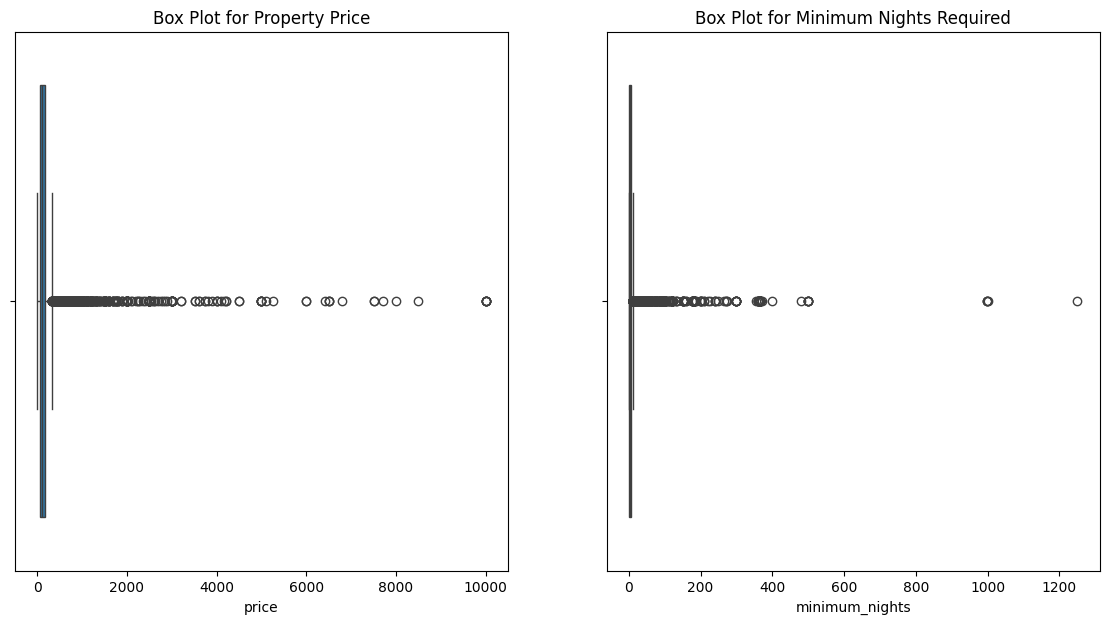

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using box plots
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x=dataset['price'])
plt.title('Box Plot for Property Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=dataset['minimum_nights'])
plt.title('Box Plot for Minimum Nights Required')

plt.show()

In [7]:
# Handling outliers: Capping extreme values in 'price' and 'minimum_nights'
# Cap 'price' at 98th percentile
price_threshold = dataset['price'].quantile(0.98)
dataset['price'] = dataset['price'].apply(lambda x: price_threshold if x > price_threshold else x)

# Cap 'minimum_nights' at 98th percentile
min_nights_threshold = dataset['minimum_nights'].quantile(0.98)
dataset['minimum_nights'] = dataset['minimum_nights'].apply(lambda x: min_nights_threshold if x > min_nights_threshold else x)

# Verify outliers handling
print(dataset['price'].describe())
print(dataset['minimum_nights'].describe())

count    48895.000000
mean       140.438613
std        105.959914
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        550.000000
Name: price, dtype: float64
count    48895.000000
mean         5.952776
std          8.674476
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64


***THE END***